In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import subprocess
import torch
import cv2
from dataloaders.visual_genome import VGDataLoader
from lib.visualize import * 

print('torch version', torch.__version__)
print('gitcommit', subprocess.check_output(['git', 'rev-parse', '--short', 'HEAD']).decode('ascii').strip())


torch version 1.9.0+cu102
gitcommit 723d7ef


# Show some test images with zero-shot triplets for Figure 1 in the paper

In [2]:
# Load VG data
data_dir = '/scratch/ssd/data'  # root folder where VG and GQA data are located
train_loader, eval_loaders = VGDataLoader.splits(data_dir=data_dir,
                                                 filter_non_overlap=False,
                                                 backbone='vgg16_old')


Loading the STANFORD split of Visual Genome

TRAIN DATASET
subj_pred_pairs, pred_obj_pairs 3397 3542
57723 images, 405860 triplets (29283 unique triplets)
Stats: 670591 objects (min=2.0, max=62.0, mean=11.6, std=5.8), 297318 FG edges (min=1.0, max=44.0, mean=5.2, std=3.8), 9029910 BG edges (156.44 avg), graph density min=0.0, max=100.0, mean=6.5, std=8.2

VAL DATASET (ZERO-SHOTS)
722 images, 1130 triplets (851 unique triplets)
Stats: 10129 objects (min=2.0, max=44.0, mean=14.0, std=7.6), 1026 FG edges (min=1.0, max=7.0, mean=1.4, std=0.9), 173934 BG edges (240.91 avg), graph density min=0.1, max=50.0, mean=2.4, std=5.3

VAL DATASET (ALL-SHOTS)
5000 images, 33203 triplets (5043 unique triplets)
Stats: 62754 objects (min=2.0, max=52.0, mean=12.6, std=7.1), 25727 FG edges (min=1.0, max=31.0, mean=5.1, std=4.4), 976590 BG edges (195.32 avg), graph density min=0.1, max=100.0, mean=6.1, std=8.7

TEST DATASET (ZERO SHOTS)
4519 images, 7601 triplets (5278 unique triplets)
Stats: 65281 objects

ZS triplets: ['bus_under_roof']


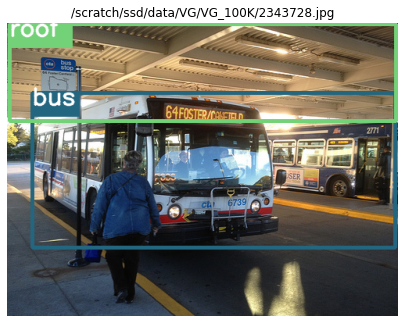

ZS triplets: ['pillow_in_trunk']


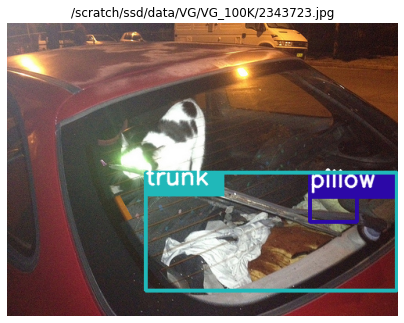

ZS triplets: ['board_above_truck']


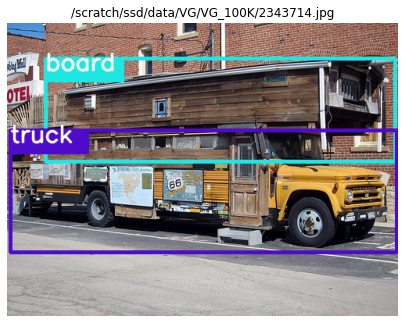

ZS triplets: ['pot_hanging from_door', 'pot_hanging from_door', 'pot_hanging from_door', 'pot_hanging from_door', 'pot_hanging from_door']


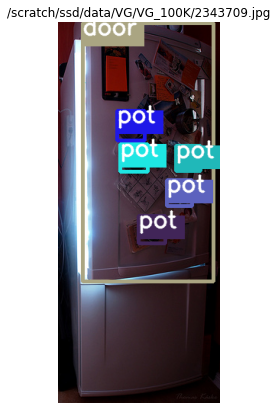

ZS triplets: ['elephant_walking on_beach', 'elephant_walking on_beach']


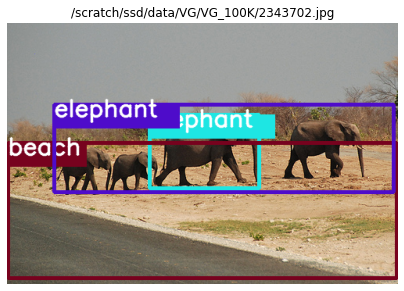

ZS triplets: ['chair_has_plate', 'table_has_towel']


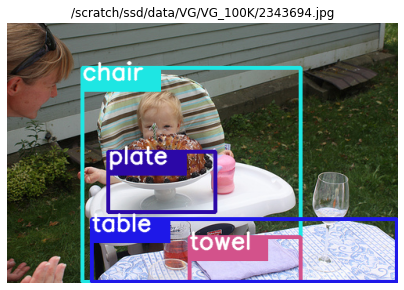

ZS triplets: ['book_has_people', 'face_near_book', 'face_in front of_box']


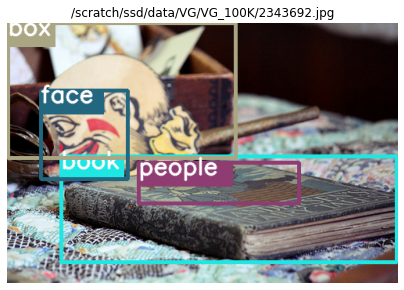

ZS triplets: ['cap_of_girl']


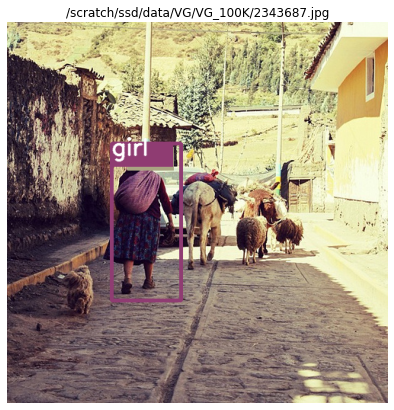

ZS triplets: ['box_with_bottle', 'bottle_on_box']


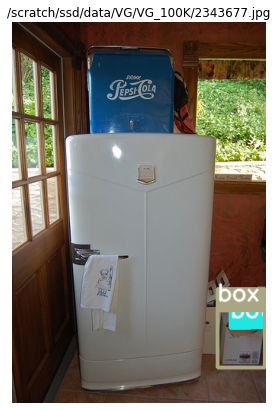

ZS triplets: ['roof_under_tree', 'elephant_in_pole', 'fence_along_pole']


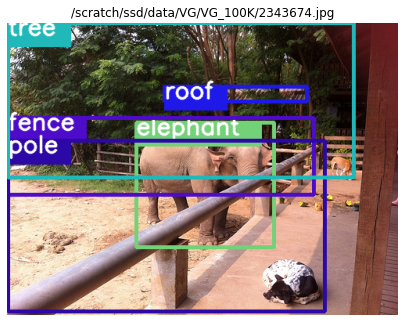

ZS triplets: ['roof_on_dog', 'dog_has_roof', 'window_on_dog', 'window_under_face', 'window_in_face']


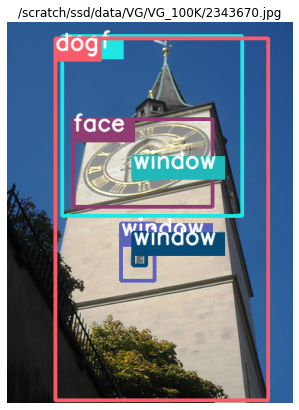

In [3]:
dataset = eval_loaders['test_zs'].dataset

n_samples = 10

for i, (im_name, gt_classes, gt_rels, boxes) in enumerate(list(zip(dataset.filenames, dataset.gt_classes, 
                                                                   dataset.relationships, dataset.gt_boxes))):
    im_path = os.path.join(dataset.images_dir, im_name)
    triplets = []
    for r in gt_rels:
        triplets.append(dataset.triplet2str('{}_{}_{}'.format(gt_classes[r[0]], r[2],  gt_classes[r[1]])))
    print('ZS triplets:', triplets)
    plt.figure(figsize=(7,7))
    im = cv2.imread(im_path)[:,:,::-1]
    obj_class_names = [dataset.ind_to_classes[cls] for cls in gt_classes]        
    plt.imshow(draw_boxes(im, obj_class_names, boxes, fontscale=1, rels=gt_rels))
    plt.title((im_path))
    plt.grid(False)
    plt.axis(False)
    plt.show()
    
    if i >= n_samples:
        break